# 1. Multi-Armed Bandit(MAB)
## 1.1 개요
**Multi-Armed Bandit(MAB)**

One-Armed Bandit(=Slot Machine)
- 카지노에 있는 슬롯머신은 한 번에 한 개의 arm을 당길 수 있다.
- => 카지노에 있는 K개의 슬롯머신을 N번 플레이 할 수 있다면?
<br></br>

Mulit-Armed Bandit
- K개의 슬롯머신에서 얻을 수 있는 reward의 확률이 모두 다르다고 가정한다.

**수익을 최대화하기 위해서는 arm을 어떤 순서대로 혹은 어떤 정책(policy)에 의해 당겨야 하는가?**

**Challenge in MAB**

문제점 : 슬롯머신의 reward 확률을 정확히 알 수 없다.

MAB 정책 예시
1. 모든 슬롯머신을 동일한 횟수로 당긴다.
- 높은 reward를 얻을 수 없다.

2. 일정 횟수만큼 슬롯머신을 당겨보고, 남은 횟수는 그 시간 동안 제일 높은 확률을 가진 슬롯머신만 당긴다.
- 동일한 슬롯만 계속 당기게 될 수 있다.

**=> Exploration & Exploitation Trade-off 발생**

**Exploration & Exploitation Trade-off**

exploration(탐색) : 더 많은 정보를 얻기 위하여 새로운 arm을 선택하는 것

exploitation(활용) : 기존의 경험 혹은 관측 값을 토대로 가장 좋은 arm을 선택하는 것
<br></br>

exploration(탐색)이 너무 많은 경우 = exploitation(활용)이 너무 적은 겨우
- 탐색에 비용을 지나치게 낭비하여 높은 reward를 얻을 수 없다.

exploration(탐색)이 너무 적은 경우 = exploitation(활용)이 너무 많은 경우
- 잘못된 슬롯머신을 활용하게 되면 높은 reward를 보장할 수 없다.

## 1.2 문제 정의
**MAB Formula**
$$q_*(a) \doteq E[R_t|A_t = a]$$
- $t$ : time step or play number
- $A_t$ : 시간 t에 play한 action
- $R_t$ : 시간 t에 받은 reward
- $q_*(a)$ : 액션 a에 따른 reward의 실제 기대값

모든 action에 대한 $q_*(a)$를 정확히 알고 있다면 문제가 해결된다.
- 하지만 실제 reward의 true distribution을 모르기 때문에 추정한다.
<br></br>

$q_*(a)$에 대한 시간 $t$에서의 추정치 $Q_t(a)$를 최대한 정밀하게 구하는 것이 목표이다.
- 추정 가치가 최대인 action을 선택하는 것을 greedy action이라고 한다.
- greedy action 선택 -> exploitation, 다른 action 선택 -> exploration

# 2. MAB 알고리즘 - 기초
## 2.1 Greedy Algorithm
**Simple Average Method(Greedy Algorithm)**
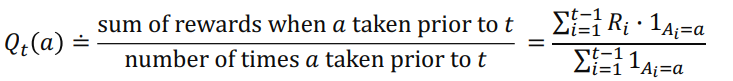
실제 기대값 $q_*(a)$의 가장 간단한 추정 방식으로 표본 평균을 사용.($q_*(a) \doteq E[R_t|A_t = a]$)
- ex)지금까지 관측된 개별 머신의 Reward 평균값

가장 간단한 policy로서 평균 리워드가 최대인 action을 선택하는 것 -> Greedy
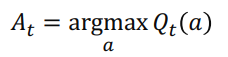
문제는 policy가 처음에 선택되는 action과 reward에 크게 영향을 받는다. exploration이 부족!

## 2.2 Epsilon-Greedy Algorithm
**Epsilon-Greedy Algorithm**

exploration이 부족한 greedy algorithm의 policy를 수정한 전략이다.

일정한 확률에 의해 랜덤으로 슬롯머신을 선택하도록 한다.
- ex) 동전을 던져 앞면이 나오면 greedy, 뒷면이 나오면 랜덤 선택. epsilon = 0.5
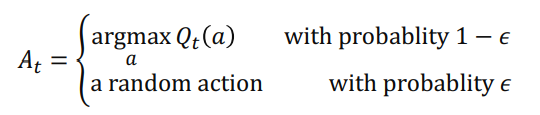
epsilon-greedy는 심플하면서도 강력한 알고리즘이다.

## 2.3 Upper Confidence Bound(UCB)
**Upper Confidence Bound(UCB)**
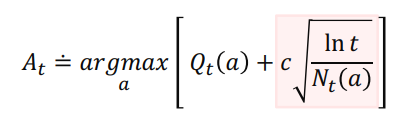
- $t$ : time step or play number
- $Q_t(a)$ : 시간 $t$에서 action $a$에 대한 reward 추정치(simple average)
- $N_t(a)$ : action $a$를 선택했던 횟수
- $c$ : exploration을 조정하는 하이퍼 파라미터
- => 새로 추가된 term이 해당 action이 최적의 action이 될 수도 있는 가능성(불확실성)

**MAB 알고리즘의 파라미터 튜닝**
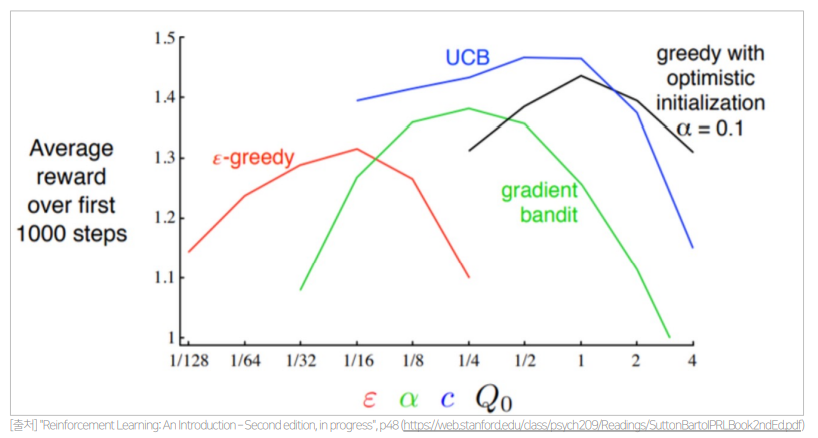

## 2.4 MAB를 이용한 추천 예시
**MAB를 이용한 추천 시스템**

기존 추천 시스템과 어떤 차이가 있을까?
- case1. 유저에게 아이템을 추천
- case2. 주어진 아이템과 유사한 아이템을 추천
<br></br>

Bandit 문제로 바꾼다면
- 실제 서비스의 지표인 클릭/구매를 모델의 reward로 가정한다.
- 해당 reward를 최대화하는 방향으로 모델이 학습되고 추천을 수행한다.
- => 무거운 추천 모델을 사용하지 않고 간단한 Bandit 기법을 적용하여도 온라인 지표가 좋아진다(CTR, CVR)

우리가 추천하는 개별 아이템은 개별 action에 해당한다

유저에게 아이템을 추천하는 방식이 MAB 알고리즘의 policy다.

아이템을 추천했을 때 사용자의 클릭 여부를 reward로 측정한다.

구현이 간단하고 이해가 쉽다 -> 실제 비즈니스 어플리케이션에 매우 유용하다.
- exploration : 지속적으로 변화하는 유저의 취향 탐색 및 추천 아이템 확장
- exploitation : 유저의 취향에 맞는 아이템 추천

**유저 추천**

개별 유저에 대해서는 모든 아이템의 Bandit을 구하는 것은 불가능하다.
- 개인별로 구축하기에는 데이터가 부족하여 Bandit이 수렴하지 않는다.
<br></br>

클러스터링을 통해 비슷한 유저끼리 그룹화한 뒤에 해당 그룹 내에서 Bandit을 구축한다.
- 클러스터 별로 아이템 후보 리스트를 생성한다(인기도 기발, CF 등의 다양한 방법)
<br></br>

=> **필요한 Bandit의 개수 = 유저 클러스터 개수 $\times$ 후보 아이템 개수**

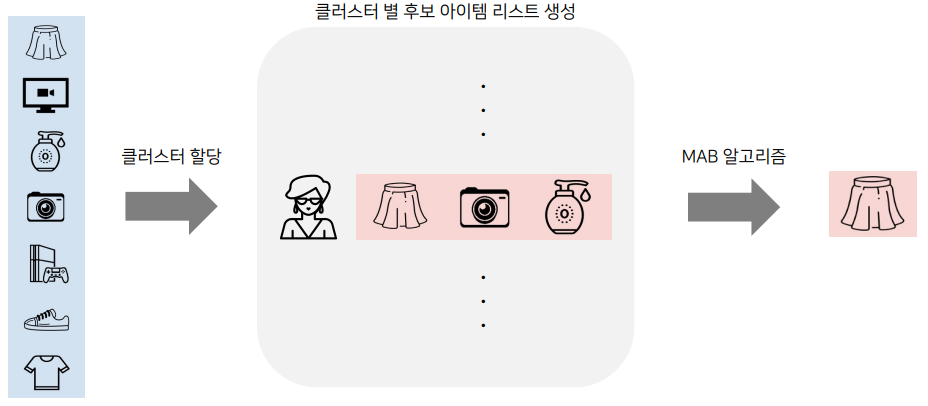

**유사 아이템 추천**

주어진 아이템과 유사한 후보 아이템 리스트를 생성하고 그 안에서 Bandit을 적용한다.
<br></br>

유사한 아이템 추출 방법
- MF, Item2Vec 기반의 유저-아이템 상관관계를 기반으로 한 유사도
- Content-Based 기반의 유사도(이미지 피처, 텍스트 피처)

=> **필요한 Bandit의 개수 = 아이템 개수 $\times$ 후보 아이템 개수**

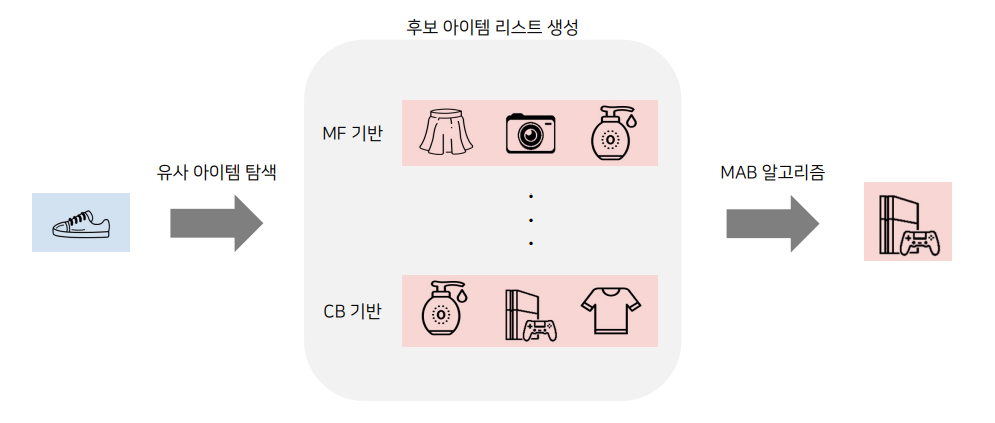

## 3. MAB 알고리즘 - 심화
## 3.1 Thompson Sampling
**Thompson Sampling**

주어진 K개의 action에 해당하는 확률분포를 구하는 문제이다.
- action $a$에 해당하는 reward가 추정치 $Q_t(a)$가 확률 분포를 따른다고 가정한다. -> 베타분포
<br></br>

베타 분포
- 두 개의 양의 변수로 표현할 수 있는 확률 분포이며 0과 1사이 값을 갖는다.
$$Beta(x|\alpha, \beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$
\*$B(\alpha,\beta)$는 $\alpha,\beta$에 정해지는 베타 함수

**Thompson Sampling 예시**

사용자에게 보여줄 수 있는 광고 배너가 있다고 가정
<br></br>

베타 분포에 필요한 데이터는 2가지
- 배너를 보고 클릭한 횟수($\alpha$)
- 배너를 보고 클릭하지 않은 횟수($\beta$)
<br></br>

배너를 클릭할 확률 ~ $Beta(\alpha + 1, \beta + 1)$
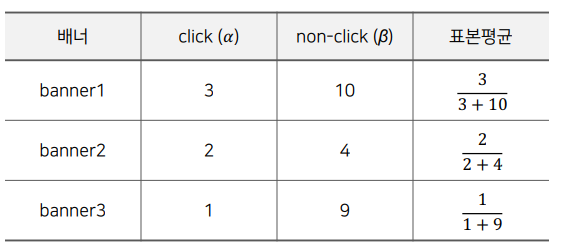

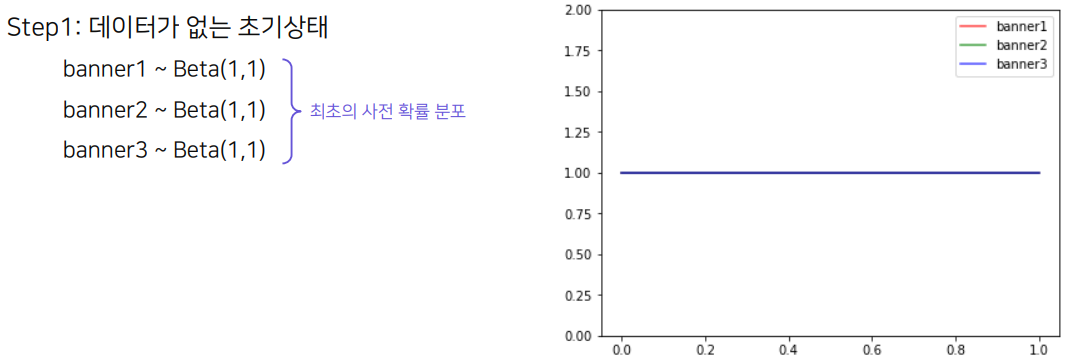
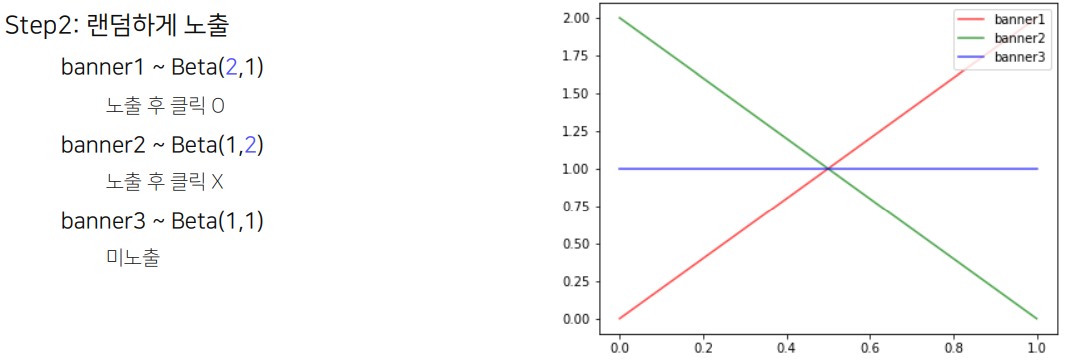
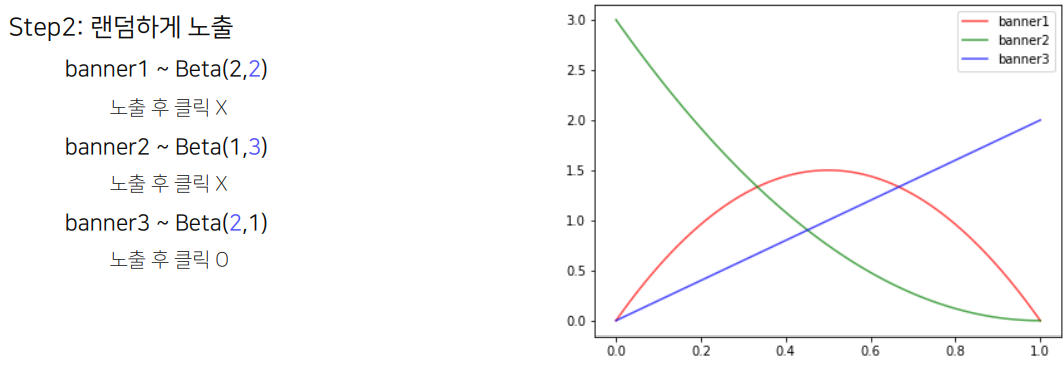
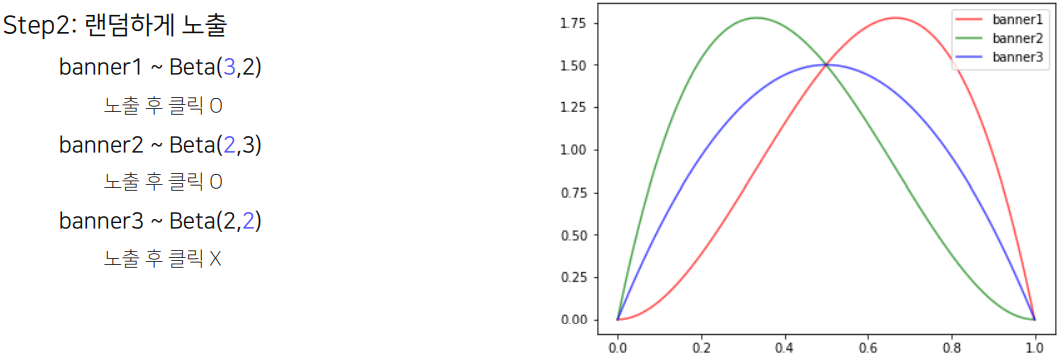
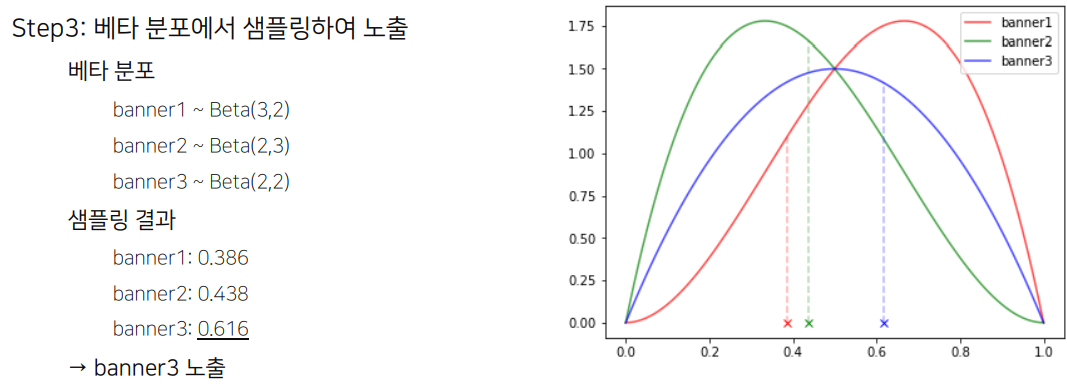
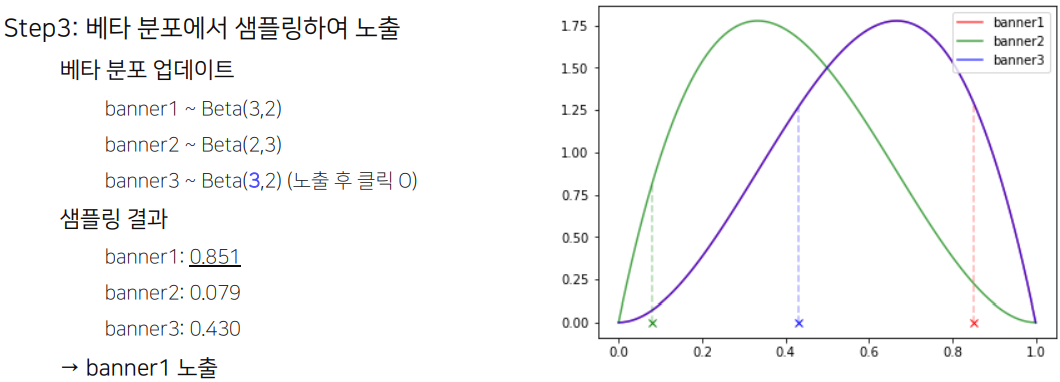
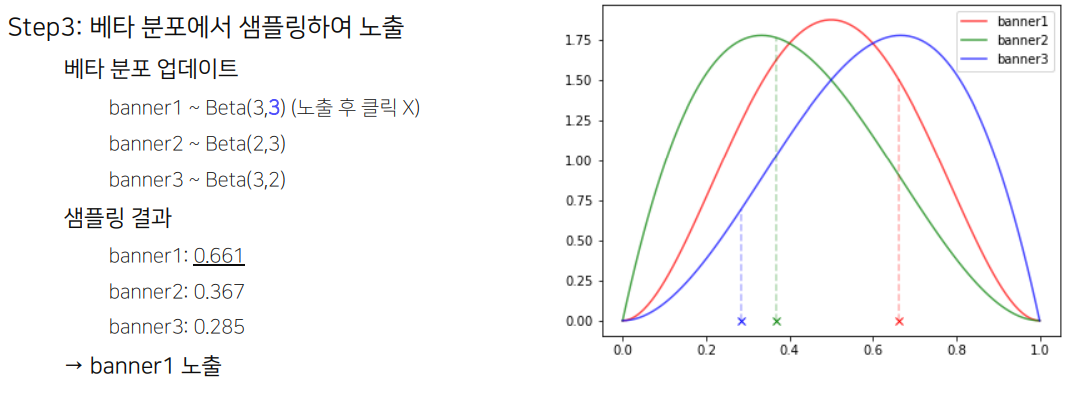
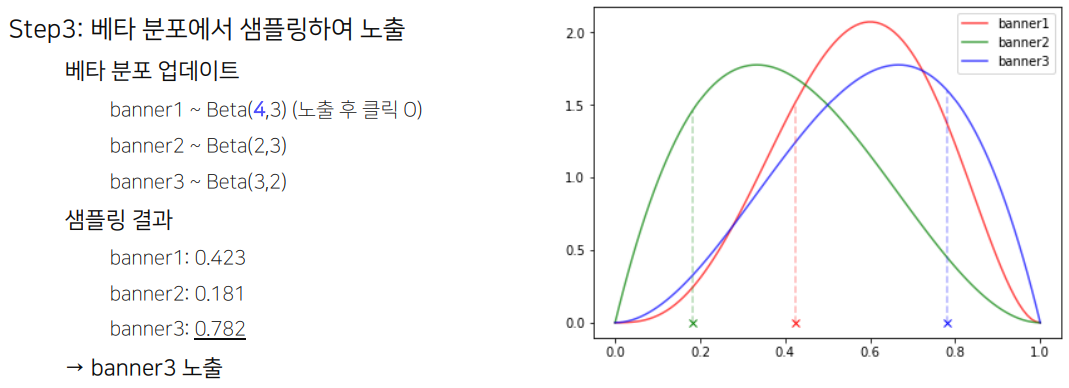
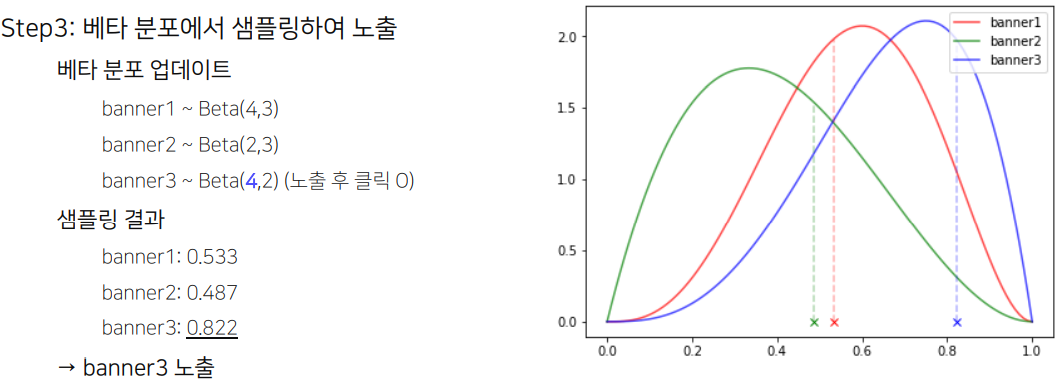
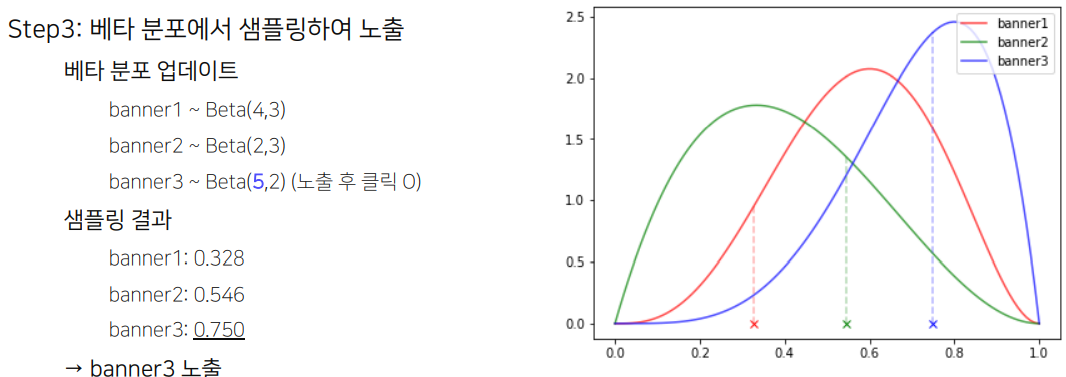
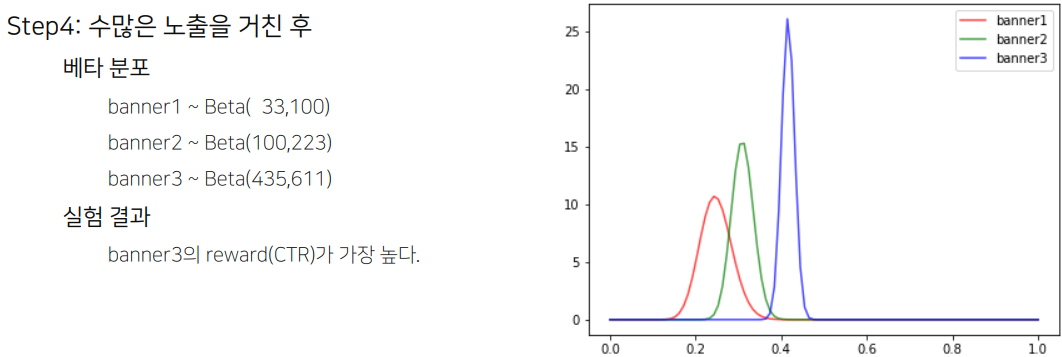

**Thompson Sampling Pseudo Code**
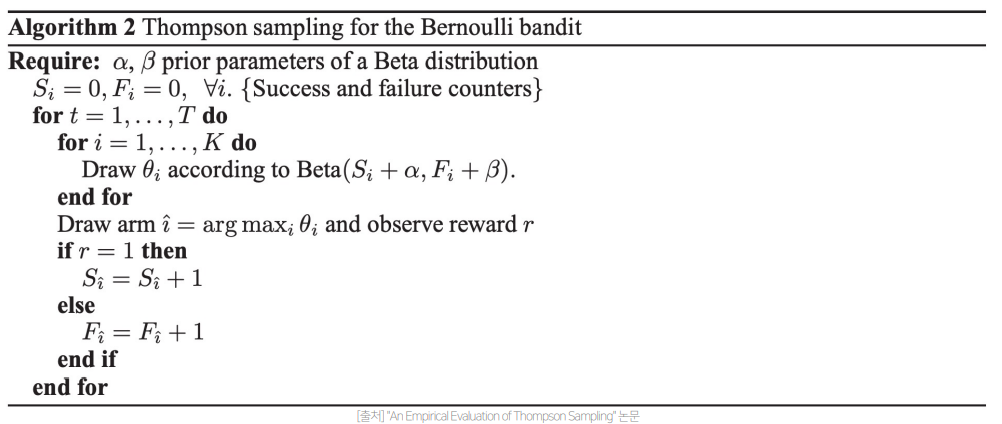

## 3.2 LinUCB
**Contextual Bandit**

Context
- 유저의 데모그래픽이나 아이템의 카테고리, 태그와 같은 여러 특성 정보
<br></br>

Context-free Bandit - $q_*(a) \doteq E[R_t|A_t=a]$
- 동일한 action에 대해 유저의 context 정보에 관계 없이 항상 동일한 reward를 가진다.
<br></br>

Contextual Bandit - $q_*(a) \doteq E[R_{t,a}|X_{t,a}]$
- 유저의 context 정보에 따라 동일한 action이더라도 다른 reward를 가진다.
- ex) 동일한 스포츠 기사를 보더라도 나이 및 성별에 따라 클릭 성향이 다르다 => 개인화 추천

**LinUCB with Disjoint Linear Models**

Arm-selection Strategy
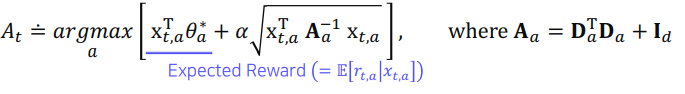

- $x_{t,a}$ : $d$-차원 컨텍스트 벡터
- $\theta_a^*$ : action $a$에 대한 $d$-차원 학습 파라미터
- $D_a$ : $t$ 시점의 $m$개의 컨텍스트 벡터(학습 데이터)로 구성된 $m\times d$ 행렬

**LinUCB 작동 예시**
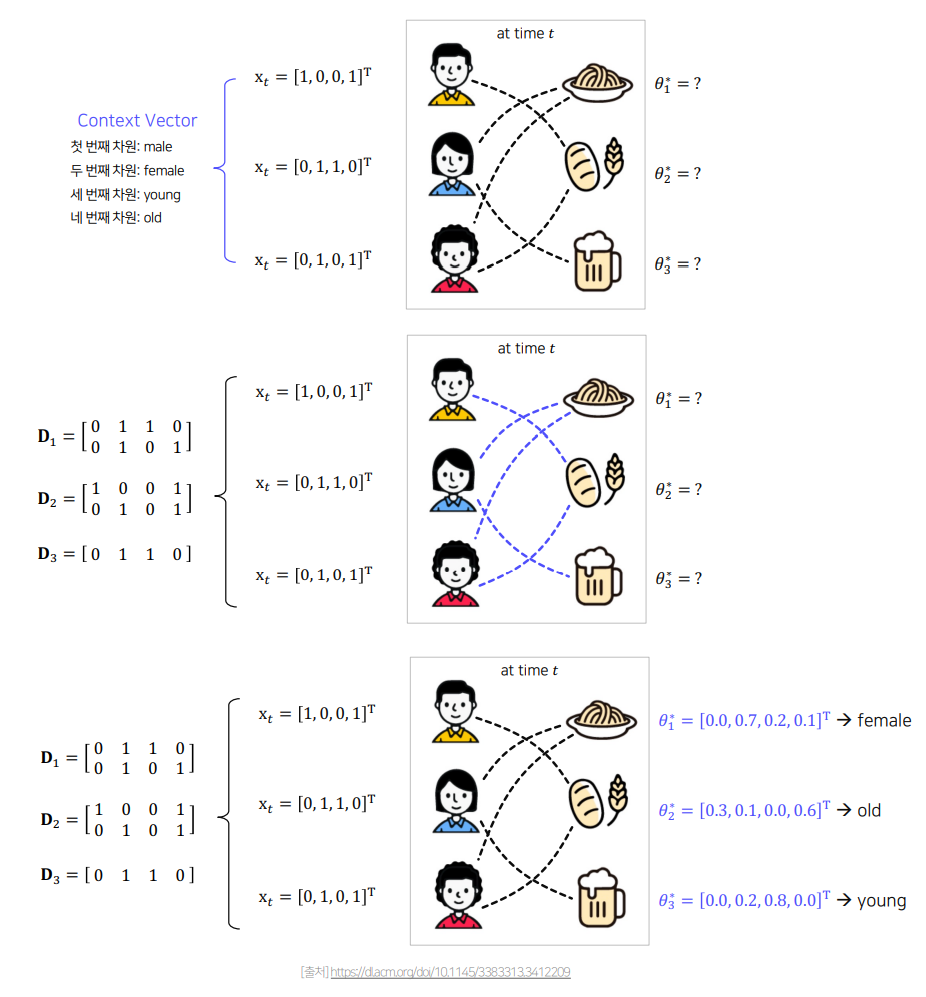

**LinUCB Pseudo Code**
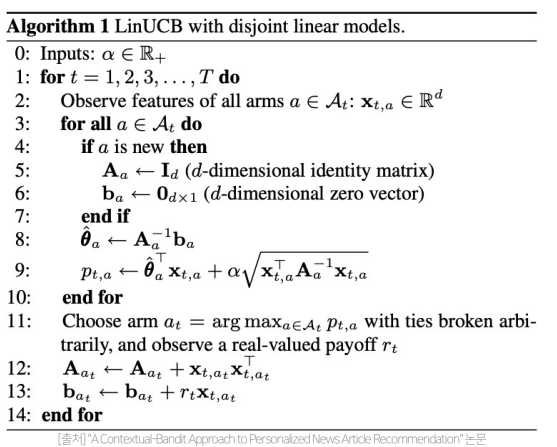

**Contestual Bandit 예시**

Naver AiRS 추천 시스템
- *인기도 기반 필터링*을 통해
- 탐색(exploration) 대상을 축소한 뒤,
- *Contextual Bandit 알고리즘*을 통해 유저의 취향을 탐색 및 활용함.
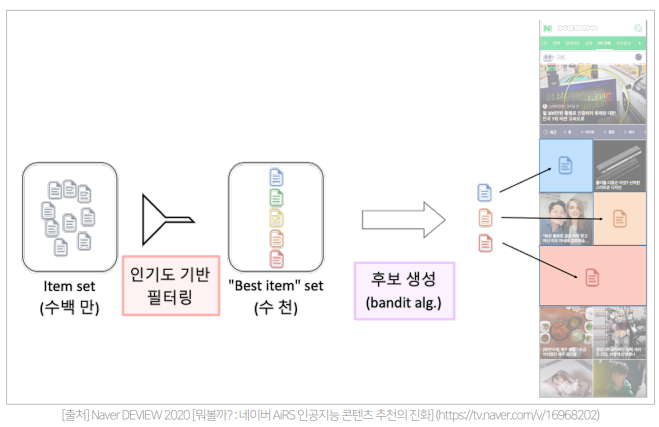